## Problem 2: Calculate and visualise the *dominance areas* of shopping centres (10 points)

In this problem, the aim is to delineate the dominance area of each shopping centre. For this 
exercise, we define the ‘dominance area’ of a shopping centre as the area from which it can 
be reached faster than other shopping centres. We will use public transport travel times.

![](images/dominance_areas_example_1000x500px.png)

*Sample result: a map showing the areas of dominance of each shopping centre, and the travel 
times to the closest shopping centre in the entire metropolitan area*



---

### Data

The **input data** is identical to what you have used for *problem 1*, 
see [there](./Exercise-4-problem-1.ipynb) for detailed data descriptions.

---


### An overview of the tasks

This task comprises of three major subtasks. In contrast to earlier exercises, we 
do not provide a detailed, step-by-step ‘cooking recipe’. Rather, you are free to
implement the necessary steps in any order you see fit, and choose any variable
names of your liking. 

To test intermediate results, implement `assert` statements, output the `head()`
of a data frame, or plot the data. Remember to add comments to all of your code,
so future you (and us) can understand what each section does.

The **only strict requirement** is the **file name** of
the **output** map plot: `DATA_DIRECTORY / "dominance_areas.png"`.

1. Load the YKR grid and the individual travel time data sets, and combine them 
   into one geo data frame. This is essentially the same as *problem 1*, except
   that you must load all eight shopping centre data files. (2 points)
2. Find the closest shopping centre to each grid cell. In the combined data set,
   find the minimum travel time to any of the shopping centres, save the value in
   a new column, and shopping centre name in another new column. (4 points)
   See the [hints](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-4/exercise-4.html#hints)
   to this exercise for a suggestions on how to achieve this 
   ([`pandas.DataFrame.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html) and
   [`pandas.DataFrame.idxmin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)
   will be helpful)
3. Visualise the dominance areas and travel times. Use 2⨉1 subplots to plot
   the most dominant (closest) shopping centre for each grid cell, and the
   travel time to the closest shopping centre for each grid cell. (4 points)

---


In [1]:
%pip install pathlib

%pip install geopandas

%pip install pandas

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/e3/23/00912e3236306ec52a06f95a08918cbb54f900419951726a20a8783a8507/geopandas-0.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/b1/c2/742eb2b16931754a910abead65bfd343b70048d691b35ee19ec94f66540e/fiona-1.9.5-cp310-cp310-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.7 MB/s eta 0:00:00
  Obtaining dependency information for pandas>=1.4.0 from https://files.pythonhosted.org/packages/b3/b3/3102c3a4abca1093e50cfec2213102a1c65c0b318a4431395d0121e6e690/pandas-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/f6/2b/b60cf73b0720abca313bfffef34e34f7f7dae23852b2853cf0368d49426b/pyproj-3.6.1-cp3

In [1]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

In [2]:
#load YKR grid
import geopandas

grid = geopandas.read_file(
    DATA_DIRECTORY / "YKR_grid_EPSG3067.gpkg"
)

In [3]:
grid.head()

,YKR_ID,geometry
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [4]:
#load individual travel time data (7 shopping malls)

#Jumbo Dixi Myyrmanni Itis Forum Iso_Omena Ruoholahti

import pandas

jumbo = pandas.read_csv(
    DATA_DIRECTORY / "travel_times_to_5878070_Jumbo.txt",
    sep=";"
)

dixi = pandas.read_csv(
    DATA_DIRECTORY / "travel_times_to_5878087_Dixi.txt",
    sep=";"
)

itis = pandas.read_csv(
    DATA_DIRECTORY / "travel_times_to_5944003_Itis.txt",
    sep=";"
)

myyrmanni = pandas.read_csv(
    DATA_DIRECTORY / "travel_times_to_5902043_Myyrmanni.txt",
    sep=";"
)

forum = pandas.read_csv(
    DATA_DIRECTORY / "travel_times_to_5975373_Forum.txt",
    sep=";"
)

iso_omena = pandas.read_csv(
    DATA_DIRECTORY / "travel_times_to_5978593_Iso_Omena.txt",
    sep=";"
)

ruoholahti = pandas.read_csv(
    DATA_DIRECTORY / "travel_times_to_5980260_Ruoholahti.txt",
    sep=";"
)


In [5]:
#discard irrelavant columns
#Jumbo Dixi Myyrmanni Itis Forum Iso_Omena Ruoholahti

jumbo = jumbo[["from_id", 
             "to_id", 
             "pt_r_t", "car_r_t"
]]

dixi = dixi[["from_id", 
             "to_id", 
             "pt_r_t", "car_r_t"
]]

itis = itis[["from_id", 
             "to_id", 
             "pt_r_t", "car_r_t"
]]

myyrmanni = myyrmanni[["from_id", 
             "to_id", 
             "pt_r_t", "car_r_t"
]]

forum = forum[["from_id", 
             "to_id", 
             "pt_r_t", "car_r_t"
]]

iso_omena = iso_omena[["from_id", 
             "to_id", 
             "pt_r_t", "car_r_t"
]]

ruoholahti = ruoholahti[["from_id", 
             "to_id", 
             "pt_r_t", "car_r_t"
]]

In [6]:
#rename columns to include reference to shopping centre
#Jumbo Dixi Myyrmanni Itis Forum Iso_Omena Ruoholahti


jumbo = jumbo.rename(columns={'pt_r_t': 'pt_r_t_jumbo', 'car_r_t': 'car_r_t_jumbo'})
dixi = dixi.rename(columns={'pt_r_t': 'pt_r_t_dixi', 'car_r_t': 'car_r_t_dixi'})
itis = itis.rename(columns={'pt_r_t': 'pt_r_t_itis', 'car_r_t': 'car_r_t_itis'})
myyrmanni = myyrmanni.rename(columns={'pt_r_t': 'pt_r_t_myyrmanni', 'car_r_t': 'car_r_t_myyrmanni'})
forum = forum.rename(columns={'pt_r_t': 'pt_r_t_forum', 'car_r_t': 'car_r_t_forum'})
iso_omena = iso_omena.rename(columns={'pt_r_t': 'pt_r_t_iso_omena', 'car_r_t': 'car_r_t_iso_omena'})
ruoholahti = ruoholahti.rename(columns={'pt_r_t': 'pt_r_t_ruoholahti', 'car_r_t': 'car_r_t_ruoholahti'})



In [7]:
forum.head()

,from_id,to_id,pt_r_t_forum,car_r_t_forum
0,5785640,5975373,110,49
1,5785641,5975373,113,49
2,5785642,5975373,115,57
3,5785643,5975373,119,60
4,5787544,5975373,103,48


In [8]:
#combine into 1 geodataframe (to grid)

#create index columns (7malls)
grid["index1"] = grid["YKR_ID"]
grid["index2"] = grid["YKR_ID"]
grid["index3"] = grid["YKR_ID"]
grid["index4"] = grid["YKR_ID"]
grid["index5"] = grid["YKR_ID"]
grid["index6"] = grid["YKR_ID"]
grid["index7"] = grid["YKR_ID"]


In [9]:
#join dataframes (7malls)
#jumbo dixi myyrmanni itis forum iso_omena ruoholahti

joint_df = grid.set_index("index1").join(jumbo.set_index("from_id"))

joint_df2 = joint_df.set_index("index2").join(dixi.set_index("from_id"), lsuffix='_jumbo', rsuffix='_dixi')

joint_df3 = joint_df2.set_index("index3").join(myyrmanni.set_index("from_id"), rsuffix='_myyrmanni')

joint_df4 = joint_df3.set_index("index4").join(itis.set_index("from_id"), rsuffix='_itis')

joint_df5 = joint_df4.set_index("index5").join(forum.set_index("from_id"), rsuffix='_forum')

joint_df6 = joint_df5.set_index("index6").join(iso_omena.set_index("from_id"), rsuffix='_iso_omena')

joint_df7 = joint_df6.set_index("index7").join(ruoholahti.set_index("from_id"), rsuffix='_ruoholahti')


In [10]:
joint_df7.head()

,YKR_ID,geometry,to_id_jumbo,pt_r_t_jumbo,car_r_t_jumbo,to_id_dixi,pt_r_t_dixi,car_r_t_dixi,to_id,pt_r_t_myyrmanni,...,car_r_t_itis,to_id_forum,pt_r_t_forum,car_r_t_forum,to_id_iso_omena,pt_r_t_iso_omena,car_r_t_iso_omena,to_id_ruoholahti,pt_r_t_ruoholahti,car_r_t_ruoholahti
index7,,,,,,,,,,,,,,,,,,,,,
5785640,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",5878070,101,39,5878087,102,45,5902043,90,...,50,5975373,110,49,5978593,141,56,5980260,118,56
5785641,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",5878070,108,39,5878087,109,45,5902043,93,...,51,5975373,113,49,5978593,143,56,5980260,121,56
5785642,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",5878070,109,45,5878087,111,52,5902043,95,...,58,5975373,115,57,5978593,145,64,5980260,123,63
5785643,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",5878070,114,46,5878087,115,48,5902043,99,...,57,5975373,119,60,5978593,149,67,5980260,127,67
5787544,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",5878070,98,38,5878087,99,44,5902043,83,...,50,5975373,103,48,5978593,134,55,5980260,111,55


In [11]:
list(joint_df7.columns)

['YKR_ID',
 'geometry',
 'to_id_jumbo',
 'pt_r_t_jumbo',
 'car_r_t_jumbo',
 'to_id_dixi',
 'pt_r_t_dixi',
 'car_r_t_dixi',
 'to_id',
 'pt_r_t_myyrmanni',
 'car_r_t_myyrmanni',
 'to_id_itis',
 'pt_r_t_itis',
 'car_r_t_itis',
 'to_id_forum',
 'pt_r_t_forum',
 'car_r_t_forum',
 'to_id_iso_omena',
 'pt_r_t_iso_omena',
 'car_r_t_iso_omena',
 'to_id_ruoholahti',
 'pt_r_t_ruoholahti',
 'car_r_t_ruoholahti']

In [12]:
#install numpy
%pip install numpy

#import numpy
import numpy

Note: you may need to restart the kernel to use updated packages.


In [13]:
#replace no data values
#jumbo dixi myyrmanni itis forum iso_omena ruoholahti
joint_df7["pt_r_t_jumbo"] = joint_df7["pt_r_t_jumbo"].replace({-1: numpy.nan})
joint_df7["car_r_t_jumbo"] = joint_df7["car_r_t_jumbo"].replace({-1: numpy.nan})

joint_df7["pt_r_t_dixi"] = joint_df7["pt_r_t_dixi"].replace({-1: numpy.nan})
joint_df7["car_r_t_dixi"] = joint_df7["car_r_t_dixi"].replace({-1: numpy.nan})

joint_df7["pt_r_t_myyrmanni"] = joint_df7["pt_r_t_myyrmanni"].replace({-1: numpy.nan})
joint_df7["car_r_t_myyrmanni"] = joint_df7["car_r_t_myyrmanni"].replace({-1: numpy.nan})

joint_df7["pt_r_t_itis"] = joint_df7["pt_r_t_itis"].replace({-1: numpy.nan})
joint_df7["car_r_t_itis"] = joint_df7["car_r_t_itis"].replace({-1: numpy.nan})

joint_df7["pt_r_t_forum"] = joint_df7["pt_r_t_forum"].replace({-1: numpy.nan})
joint_df7["car_r_t_forum"] = joint_df7["car_r_t_forum"].replace({-1: numpy.nan})

joint_df7["pt_r_t_iso_omena"] = joint_df7["pt_r_t_iso_omena"].replace({-1: numpy.nan})
joint_df7["car_r_t_iso_omena"] = joint_df7["car_r_t_iso_omena"].replace({-1: numpy.nan})

joint_df7["pt_r_t_ruoholahti"] = joint_df7["pt_r_t_ruoholahti"].replace({-1: numpy.nan})
joint_df7["car_r_t_ruoholahti"] = joint_df7["car_r_t_ruoholahti"].replace({-1: numpy.nan})


In [14]:
grid = joint_df7

In [15]:
list(grid.columns)

['YKR_ID',
 'geometry',
 'to_id_jumbo',
 'pt_r_t_jumbo',
 'car_r_t_jumbo',
 'to_id_dixi',
 'pt_r_t_dixi',
 'car_r_t_dixi',
 'to_id',
 'pt_r_t_myyrmanni',
 'car_r_t_myyrmanni',
 'to_id_itis',
 'pt_r_t_itis',
 'car_r_t_itis',
 'to_id_forum',
 'pt_r_t_forum',
 'car_r_t_forum',
 'to_id_iso_omena',
 'pt_r_t_iso_omena',
 'car_r_t_iso_omena',
 'to_id_ruoholahti',
 'pt_r_t_ruoholahti',
 'car_r_t_ruoholahti']

In [16]:
grid.head()

,YKR_ID,geometry,to_id_jumbo,pt_r_t_jumbo,car_r_t_jumbo,to_id_dixi,pt_r_t_dixi,car_r_t_dixi,to_id,pt_r_t_myyrmanni,...,car_r_t_itis,to_id_forum,pt_r_t_forum,car_r_t_forum,to_id_iso_omena,pt_r_t_iso_omena,car_r_t_iso_omena,to_id_ruoholahti,pt_r_t_ruoholahti,car_r_t_ruoholahti
index7,,,,,,,,,,,,,,,,,,,,,
5785640,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",5878070,101.0,39.0,5878087,102.0,45.0,5902043,90.0,...,50.0,5975373,110.0,49.0,5978593,141.0,56.0,5980260,118.0,56.0
5785641,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",5878070,108.0,39.0,5878087,109.0,45.0,5902043,93.0,...,51.0,5975373,113.0,49.0,5978593,143.0,56.0,5980260,121.0,56.0
5785642,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",5878070,109.0,45.0,5878087,111.0,52.0,5902043,95.0,...,58.0,5975373,115.0,57.0,5978593,145.0,64.0,5980260,123.0,63.0
5785643,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",5878070,114.0,46.0,5878087,115.0,48.0,5902043,99.0,...,57.0,5975373,119.0,60.0,5978593,149.0,67.0,5980260,127.0,67.0
5787544,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",5878070,98.0,38.0,5878087,99.0,44.0,5902043,83.0,...,50.0,5975373,103.0,48.0,5978593,134.0,55.0,5980260,111.0,55.0


In [ ]:
# ADD YOUR OWN CODE HERE #DONE
#load YKR grid
#load individual travel time data (8 shopping malls)
#combine into 1 geodataframe (to grid)
#replace nodata values with None

In [21]:
len(grid)

13231

In [19]:
list(grid.columns)

['YKR_ID',
 'geometry',
 'to_id_jumbo',
 'pt_r_t_jumbo',
 'car_r_t_jumbo',
 'to_id_dixi',
 'pt_r_t_dixi',
 'car_r_t_dixi',
 'to_id',
 'pt_r_t_myyrmanni',
 'car_r_t_myyrmanni',
 'to_id_itis',
 'pt_r_t_itis',
 'car_r_t_itis',
 'to_id_forum',
 'pt_r_t_forum',
 'car_r_t_forum',
 'to_id_iso_omena',
 'pt_r_t_iso_omena',
 'car_r_t_iso_omena',
 'to_id_ruoholahti',
 'pt_r_t_ruoholahti',
 'car_r_t_ruoholahti']

In [18]:
#create empty lists
minimum = []

In [35]:
grid.head()

,YKR_ID,geometry,to_id_jumbo,pt_r_t_jumbo,car_r_t_jumbo,to_id_dixi,pt_r_t_dixi,car_r_t_dixi,to_id,pt_r_t_myyrmanni,...,to_id_iso_omena,pt_r_t_iso_omena,car_r_t_iso_omena,to_id_ruoholahti,pt_r_t_ruoholahti,car_r_t_ruoholahti,value,minvalue,min_name,mall
index7,,,,,,,,,,,,,,,,,,,,,
5785640,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",5878070,101.0,39.0,5878087,102.0,45.0,5902043,90.0,...,5978593,141.0,56.0,5980260,118.0,56.0,39.0,39.0,car_r_t_jumbo,Jumbo
5785641,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",5878070,108.0,39.0,5878087,109.0,45.0,5902043,93.0,...,5978593,143.0,56.0,5980260,121.0,56.0,39.0,39.0,car_r_t_jumbo,Jumbo
5785642,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",5878070,109.0,45.0,5878087,111.0,52.0,5902043,95.0,...,5978593,145.0,64.0,5980260,123.0,63.0,45.0,45.0,car_r_t_jumbo,Jumbo
5785643,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",5878070,114.0,46.0,5878087,115.0,48.0,5902043,99.0,...,5978593,149.0,67.0,5980260,127.0,67.0,46.0,46.0,car_r_t_jumbo,Jumbo
5787544,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",5878070,98.0,38.0,5878087,99.0,44.0,5902043,83.0,...,5978593,134.0,55.0,5980260,111.0,55.0,38.0,38.0,car_r_t_jumbo,Jumbo


In [27]:
#find min values
grid["minvalue"] = grid[['pt_r_t_jumbo', 'car_r_t_jumbo', 
      'pt_r_t_dixi', 'car_r_t_dixi', 
      'pt_r_t_myyrmanni', 'car_r_t_myyrmanni',
      'pt_r_t_itis', 'car_r_t_itis',
      'pt_r_t_forum', 'car_r_t_forum',
      'pt_r_t_iso_omena', 'car_r_t_iso_omena',
      'pt_r_t_ruoholahti', 'car_r_t_ruoholahti'
]].min(axis=1)

      
      



In [29]:
#find min column
grid["min_name"] = grid[['pt_r_t_jumbo', 'car_r_t_jumbo', 
      'pt_r_t_dixi', 'car_r_t_dixi', 
      'pt_r_t_myyrmanni', 'car_r_t_myyrmanni',
      'pt_r_t_itis', 'car_r_t_itis',
      'pt_r_t_forum', 'car_r_t_forum',
      'pt_r_t_iso_omena', 'car_r_t_iso_omena',
      'pt_r_t_ruoholahti', 'car_r_t_ruoholahti'
]].idxmin(axis=1)

/tmp/ipykernel_183/3971711691.py:2: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  grid["min_name"] = grid[['pt_r_t_jumbo', 'car_r_t_jumbo',


In [32]:
#create function to convert names of malls

def name_convert(name):
    #convert name based on what is shown
    #jumbo
    if (name == 'pt_r_t_jumbo' or name == 'car_r_t_jumbo'):
        #convert name
        new_name = "Jumbo"
        return new_name
    elif (name == 'pt_r_t_dixi' or name == 'car_r_t_dixi'):
        #convert name
        new_name = "Dixi"
        return new_name
    elif (name == 'pt_r_t_myyrmanni' or name == 'car_r_t_myyrmanni'):
        #convert name
        new_name = "Myyrmanni"
        return new_name
    elif (name ==  'pt_r_t_itis' or name == 'car_r_t_itis'):
        #convert name
        new_name = "Itis"
        return new_name
    elif (name == 'pt_r_t_forum' or name == 'car_r_t_forum'):
        #convert name
        new_name = "Forum"
        return new_name
    elif (name == 'pt_r_t_iso_omena' or name == 'car_r_t_iso_omena'):
        #convert name
        new_name = "Omena"
        return new_name
    elif (name == 'pt_r_t_ruoholahti' or name == 'car_r_t_ruoholahti'):
        #convert name
        new_name = "Ruoholahti"
        return new_name
    else:
        new_name = "Invalid Input"
        return new_name

    

In [34]:
#convert min_name columns to shopping mall names

#iterrate through every row, use if loop to id the name and convert to corresponding mall
#can use apply() too

grid["mall"] = grid["min_name"].apply(name_convert)


In [ ]:
#create empty lists

#find min values

#find min column

#update grid dataframe

In [ ]:
# ADD YOUR OWN CODE HERE 
#find closest shopping centre to each cell
#save value in new column, shopping centre name in another column


#min() finds the smallest value for each row


#idxmin() finds the column with the smallest value for each row



In [38]:
%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/19/e5/a4ea514515f270224435c69359abb7a3d152ed31b9ee3ba5e63017461945/matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/58/56/e2c43dcfa1f9c7db4d5e3d6f5134b24ed953f4e2133a4b12f0062148db58/contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/e8/68/af41b7cfd35c7418e17b6a43bb106be4b0f0e5feb405a88dee29b186f2a7/fonttools-4.47.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [39]:
#install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

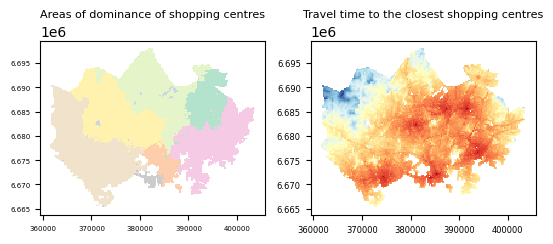

In [81]:
# Prepare sub plots that are next to each other
figure, (axis1, axis2) = plt.subplots(nrows=1, ncols=2)


#Plot closest shopping centre
grid.plot(ax=axis1, column='mall', cmap="Pastel2")
axis1.set_title("Areas of dominance of shopping centres", fontsize = 8)
axis1.tick_params(axis='both', which='major', labelsize=5)
axis1.tick_params(axis='both', which='minor', labelsize=5)


#Plot shortest travelling time
grid.plot(ax=axis2, column='minvalue', cmap="RdYlBu")
axis2.set_title("Travel time to the closest shopping centres", fontsize = 8)
axis2.tick_params(axis='both', which='major', labelsize=6)
axis2.tick_params(axis='both', which='minor', labelsize=6)



In [ ]:
# ADD YOUR OWN CODE HERE
#plot the most dominant (closest) shopping centre for each grid cell
#travel time to the closest shopping centre for each grid cell.


#create 2x1 subplots
#1st plot = closest shopping centre ("mall")
#2nd plot = travel time to closest shopping centre ("minvalue")





In [82]:
# ADD YOUR OWN CODE HERE
#save plots as png file
figure.savefig(
    DATA_DIRECTORY / "dominance_areas.png"
)

In [83]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
assert (DATA_DIRECTORY / "dominance_areas.png").exists()


--- 

**Do not forget to plot the result map, and save it to `DATA_DIRECTORY / "dominance_areas.png"`!**

---

## Reflections

This was a significantly more complex exercise that previous ones, and it included finding
a solution yourself. 

- What was most difficult part? 
- Where did you get stuck? 
- What was the easiest, and
- what was the most fun part of this exercise?

Add your answer below


---

## Well done!

Congratulations, you completed exercise 4. Good Job!